Data Science Salaries 2023 💸
<br>
Salaries of Different Data Science Fields in the Data Science Domain

<ul>
  <li><strong>work_year:</strong> The year the salary was paid.</li>
  <li><strong>experience_level:</strong> The experience level in the job during the year.</li>
  <li><strong>employment_type:</strong> The type of employment for the role.</li>
  <li><strong>job_title:</strong> The role worked in during the year.</li>
  <li><strong>salary:</strong> The total gross salary amount paid.</li>
  <li><strong>salary_currency:</strong> The currency of the salary paid as an ISO 4217 currency code.</li>
  <li><strong>salaryinusd:</strong> The salary in USD.</li>
  <li><strong>employee_residence:</strong> Employee's primary country of residence during the work year as an ISO 3166 country code.</li>
  <li><strong>remote_ratio:</strong> The overall amount of work done remotely.</li>
  <li><strong>company_location:</strong> The country of the employer's main office or contracting branch.</li>
  <li><strong>company_size:</strong> The median number of people that worked for the company during the year.</li>
</ul>


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from ydata_profiling import ProfileReport 


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Import OneHotEncode

# Working with dates and times
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score



# Importing all linear regression algorithms from Scikit-learn
from sklearn.linear_model import LinearRegression      # Standard Linear Regression
from sklearn.linear_model import Ridge                # Ridge Regression (L2 regularization)
from sklearn.linear_model import Lasso                # Lasso Regression (L1 regularization)
from sklearn.linear_model import ElasticNet           # ElasticNet (Combination of L1 and L2)
from sklearn.linear_model import SGDRegressor         # Stochastic Gradient Descent for regression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import SGDRegressor


# here we imported all the perfo matrix
from sklearn.metrics import  mean_absolute_error, mean_squared_error,r2_score,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix


In [2]:
dataScienceSalaries_pred = pd.read_csv('ds_salaries.csv.')
dataScienceSalaries_pred.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
# Generate a profile report
profile = ProfileReport(dataScienceSalaries_pred, title="Pandas Profiling Report")

# Save the report to an HTML file
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
dataScienceSalaries_pred.shape 

(3755, 11)

In [5]:
dataScienceSalaries_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
dataScienceSalaries_pred.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3544,2021,EN,FT,Research Scientist,60000,GBP,82528,GB,50,GB,L
2669,2022,SE,FT,Data Analyst,81666,USD,81666,US,100,US,M
3043,2022,MI,FT,Data Engineer,24000,USD,24000,US,0,US,M
2521,2022,SE,FT,Data Engineer,180000,USD,180000,US,0,US,M
2785,2022,MI,FT,Data Scientist,83000,GBP,102200,GB,100,GB,M


In [7]:
# Find total null values in each column
null_values = dataScienceSalaries_pred.isnull().sum()

# Print the total count of null values for each column
print("Null values in each column:\n", null_values)


Null values in each column:
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [8]:
duplicates = dataScienceSalaries_pred.duplicated()

# Count total duplicates
total_duplicates = duplicates.sum()

# Print total duplicate rows
print(f"Total duplicate rows: {total_duplicates}")


print()
print(duplicates)


Total duplicate rows: 1171

0       False
1       False
2       False
3       False
4       False
        ...  
3750    False
3751    False
3752    False
3753    False
3754    False
Length: 3755, dtype: bool


In [9]:

# Assuming df is your DataFrame
dataScienceSalaries_pred = dataScienceSalaries_pred.drop_duplicates()
dataScienceSalaries_pred.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [10]:
duplicates = dataScienceSalaries_pred.duplicated()

# Count total duplicates
total_duplicates = duplicates.sum()

# Print total duplicate rows
print(f"Total duplicate rows: {total_duplicates}")

Total duplicate rows: 0


In [11]:
dataScienceSalaries_pred.describe()


,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [12]:
dataScienceSalaries_pred.describe().corr()


,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,0.073179,0.075069,0.391704
salary,0.073179,1.000000,0.905481,-0.127526
salary_in_usd,0.075069,0.905481,1.000000,-0.333722
remote_ratio,0.391704,-0.127526,-0.333722,1.000000


In [13]:
# Assuming 'data' is your DataFrame
categorical_columns = dataScienceSalaries_pred.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [14]:
dataScienceSalaries_pred.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [15]:
dataScienceSalaries_pred['remote_ratio'].value_counts()

remote_ratio
100    1211
0      1186
50      187
Name: count, dtype: int64

In [16]:
# Filter categorical columns
categorical_columns = dataScienceSalaries_pred.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')


In [17]:
dataScienceSalaries_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [18]:
dataScienceSalaries_pred.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [19]:
dataScienceSalaries_pred['experience_level'].value_counts()

experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28048\2384319121.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataScienceSalaries_pred, palette='inferno', x=column, ax=axes[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28048\2384319121.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataScienceSalaries_pred, palette='inferno', x=column, ax=axes[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28048\2384319121.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataScienceSalaries_pred, palette='inferno', x=column

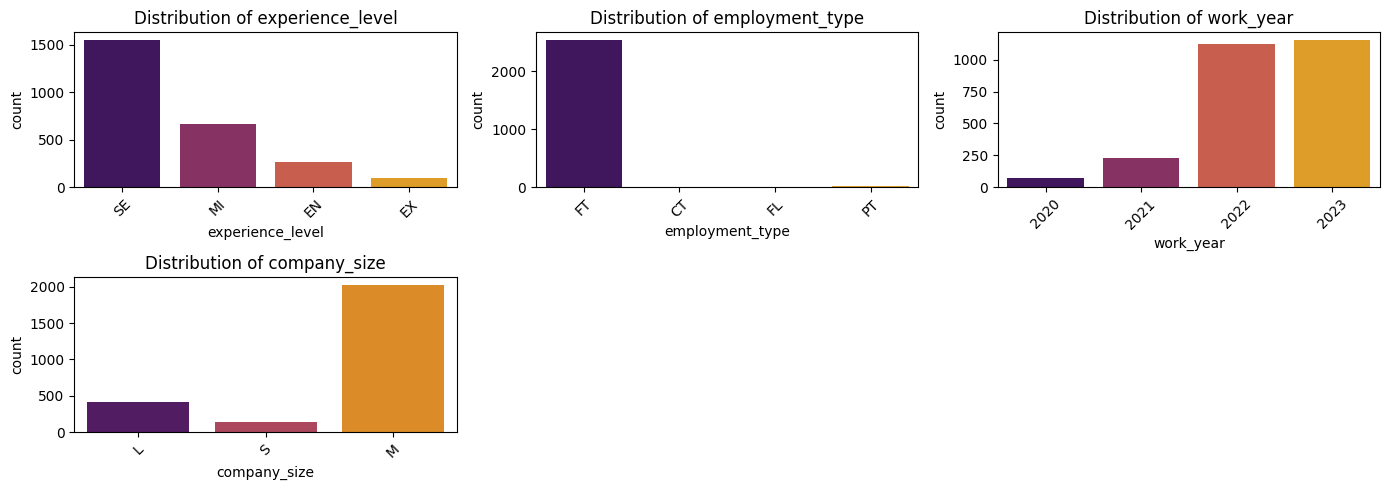

In [20]:
# List of categorical columns

categorical_columns = ['experience_level', 'employment_type','work_year',
                     
                        'company_size']

# Number of columns for subplots
num_columns = len(categorical_columns)

# Determine layout for subplots
cols = 3  # Number of columns in the plot grid
rows = (num_columns // cols) + (num_columns % cols > 0)  # Calculate number of rows

# Set up the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 5))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Create count plots for each categorical column

for i, column in enumerate(categorical_columns):
   
    sns.countplot(data=dataScienceSalaries_pred, palette='inferno', x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    # plt.figure(figsize=(10,6))
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


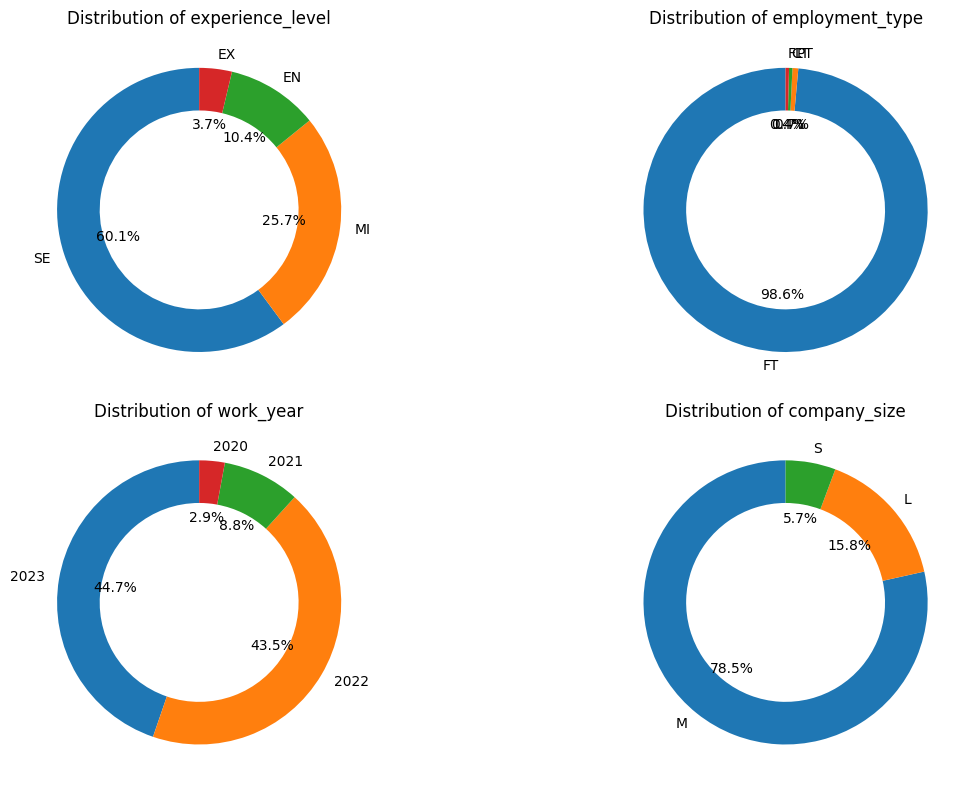

In [21]:

# List of categorical columns
categorical_columns = ['experience_level', 'employment_type', 'work_year', 'company_size']

# Number of columns for subplots
num_columns = len(categorical_columns)

# Determine layout for subplots
cols = 2  # Number of columns in the plot grid
rows = (num_columns // cols) + (num_columns % cols > 0)  # Calculate number of rows

# Set up the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 8))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Create pie plots for each categorical column
for i, column in enumerate(categorical_columns):
    # Count the values in the categorical column
    value_counts = dataScienceSalaries_pred[column].value_counts()
    
    # Create the pie plot
    axes[i].pie(value_counts, autopct='%1.1f%%', startangle=90, 
                 labels=value_counts.index, wedgeprops=dict(width=0.3))
    
    # Set the title for the subplot
    axes[i].set_title(f'Distribution of {column}')
    
# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [22]:
dataScienceSalaries_pred.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28048\3263727956.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=job_title, x='Job Title', y='Counts', palette='inferno')


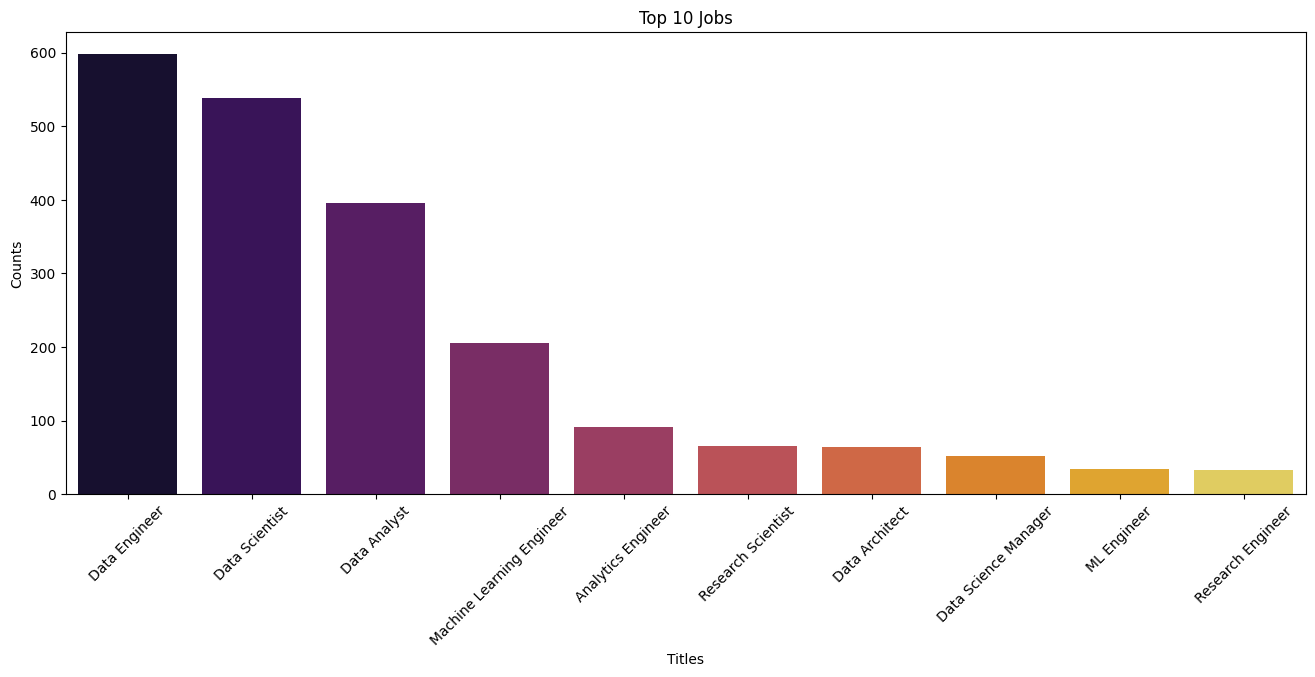

In [23]:
job_title = dataScienceSalaries_pred['job_title'].value_counts().head(10)


job_title = job_title.reset_index()
job_title.columns = ['Job Title', 'Counts']


plt.figure(figsize=(16, 6))
sns.barplot(data=job_title, x='Job Title', y='Counts', palette='inferno')
plt.xticks(rotation=45)
plt.title('Top 10 Jobs')
plt.xlabel('Titles')
plt.ylabel('Counts')
plt.show()

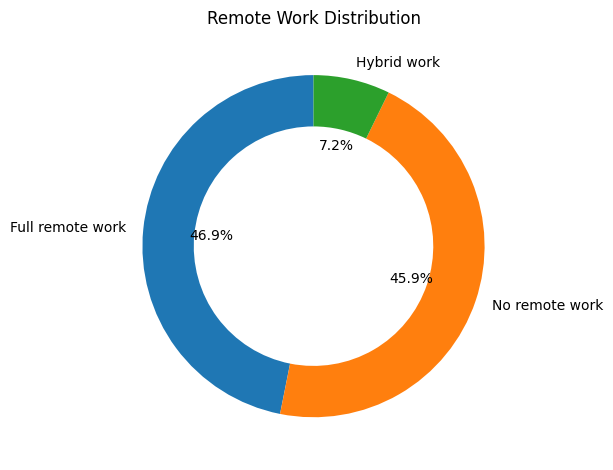

In [24]:
dataScienceSalaries_pred['remote_ratio'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
labels=['Full remote work', 'No remote work', 'Hybrid work'], 
startangle=90, wedgeprops=dict(width=0.3))
plt.title('Remote Work Distribution')
plt.ylabel('')  
plt.tight_layout()
plt.show()

# Bivariant Analysis

In [25]:
dataScienceSalaries_pred.groupby('salary_currency')['salary'].describe()


,count,mean,std,min,25%,50%,75%,max
salary_currency,,,,,,,,
AUD,9.0,1.057778e+05,4.074242e+04,56000.0,77000.0,100000.0,120000.0,193000.0
BRL,6.0,6.561667e+04,3.057675e+04,32400.0,42225.0,58800.0,93450.0,102000.0
CAD,25.0,1.246600e+05,5.211280e+04,55000.0,90000.0,110000.0,157000.0,250000.0
CHF,4.0,9.525000e+04,2.825332e+04,54000.0,88500.0,106000.0,112750.0,115000.0
CLP,1.0,3.040000e+07,NaN,30400000.0,30400000.0,30400000.0,30400000.0,30400000.0
CZK,1.0,1.200000e+05,NaN,120000.0,120000.0,120000.0,120000.0,120000.0
DKK,3.0,2.000000e+05,9.165151e+04,120000.0,150000.0,180000.0,240000.0,300000.0
EUR,200.0,5.893660e+04,2.817024e+04,6000.0,40000.0,55500.0,70000.0,200000.0
GBP,144.0,6.817840e+04,3.477642e+04,27000.0,47375.0,60013.5,83300.0,350000.0


In [26]:
grouped_analysis = dataScienceSalaries_pred.groupby(['job_title', 'experience_level']).agg({'salary_in_usd': 'mean'}).reset_index().sort_values(by='salary_in_usd', ascending=False).head(10)
display(grouped_analysis)

,job_title,experience_level,salary_in_usd
174,Principal Data Scientist,EX,416000.000000
66,Data Analytics Lead,SE,405000.000000
104,Data Science Tech Lead,SE,375000.000000
45,Cloud Data Architect,SE,250000.000000
126,Head of Data,EX,238183.333333
118,Director of Data Science,EX,224384.500000
163,Machine Learning Software Engineer,SE,212688.888889
81,Data Lead,SE,212500.000000
17,Applied Data Scientist,SE,208439.333333
168,NLP Engineer,SE,205000.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28048\2552127925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_analysis, x='salary_in_usd', y='job_title', palette='cividis')


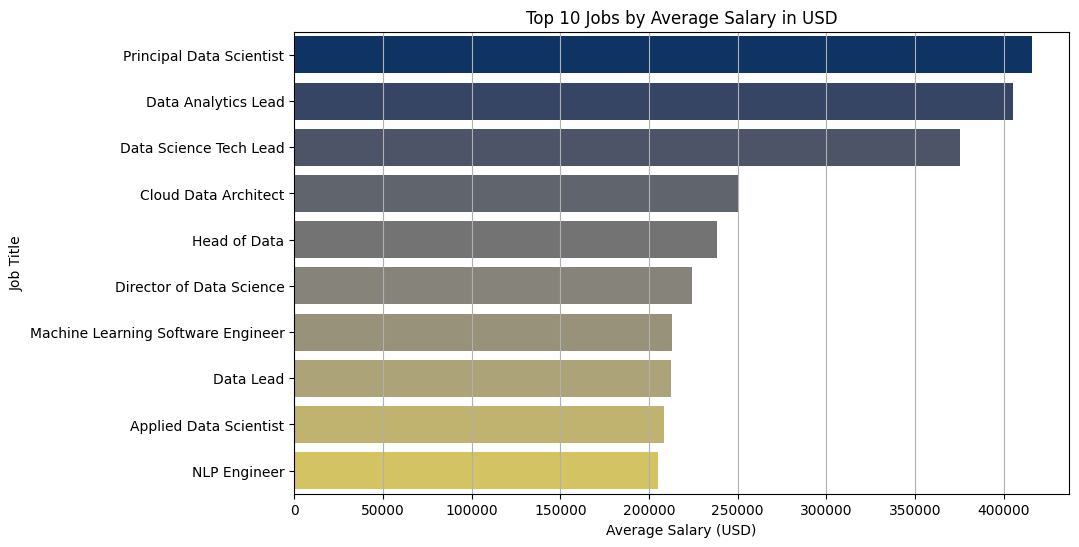

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_analysis, x='salary_in_usd', y='job_title', palette='cividis')
plt.title('Top 10 Jobs by Average Salary in USD')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.grid(axis='x')
plt.show()


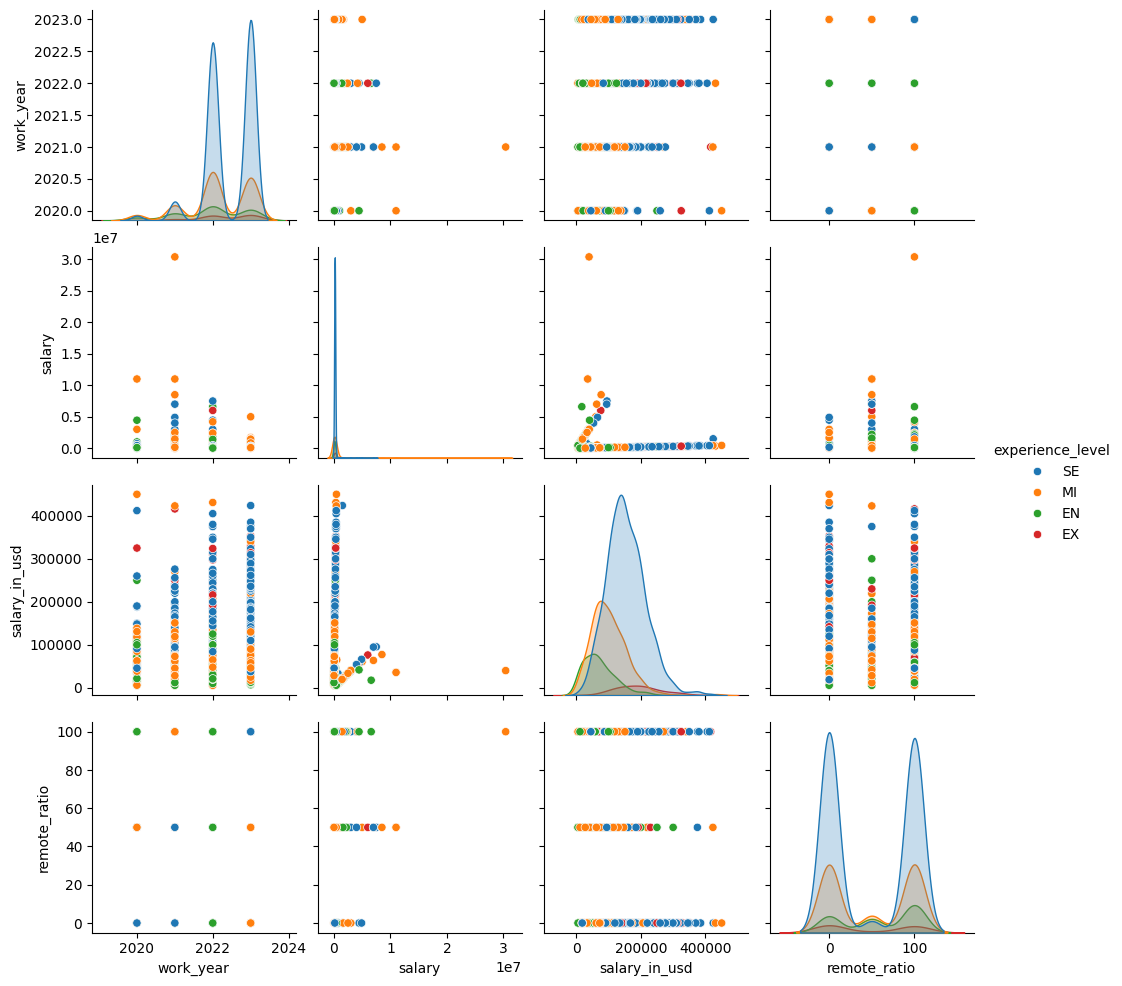

In [28]:
# Plot the pair plot
sns.pairplot(dataScienceSalaries_pred,hue = 'experience_level')
plt.show()

In [29]:
# Select numerical columns
numerical_data =dataScienceSalaries_pred.select_dtypes(include='number').columns.tolist()
numerical_data

['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

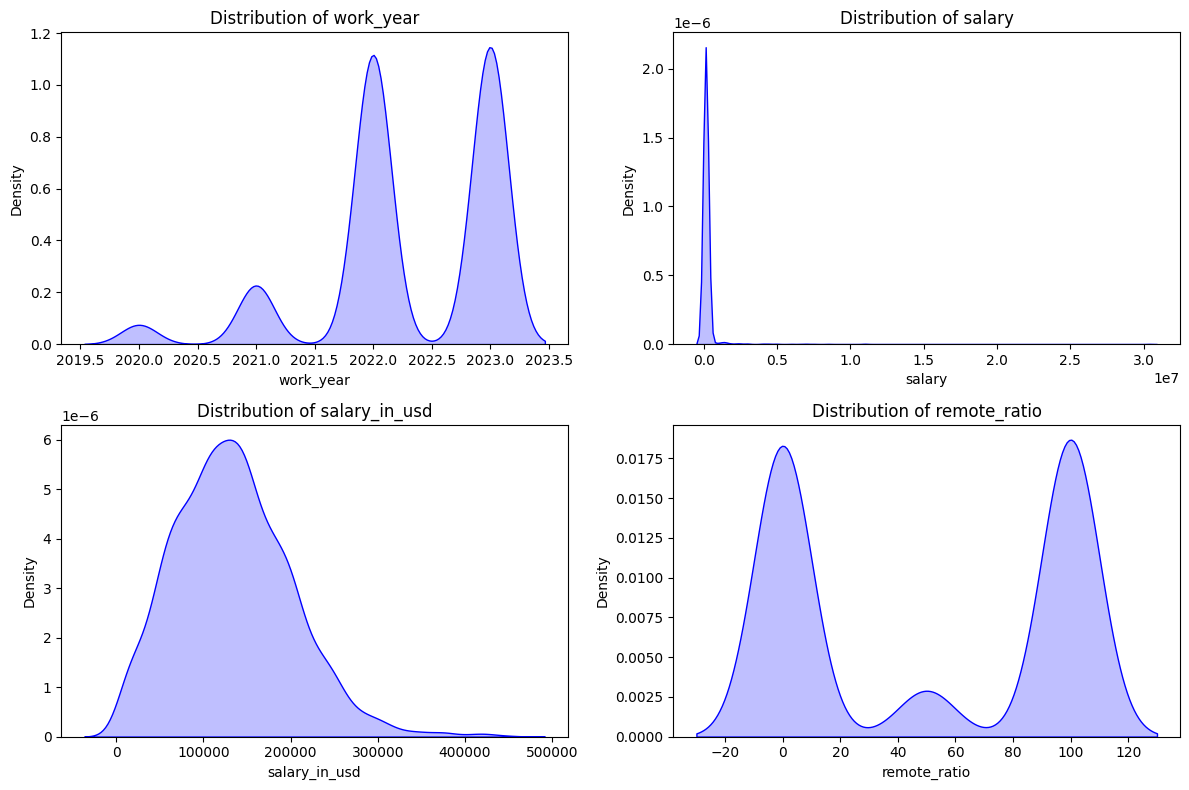

In [30]:

# List of columns to plot
columns_to_plot = ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

# Number of columns for subplots
num_columns = len(columns_to_plot)

# Determine layout for subplots
cols = 2  # Number of columns in the plot grid
rows = (num_columns // cols) + (num_columns % cols > 0)  # Calculate number of rows

# Set up the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Create KDE plots for each specified column
for i, column in enumerate(columns_to_plot):
    sns.kdeplot(dataScienceSalaries_pred[column], color='blue', fill=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


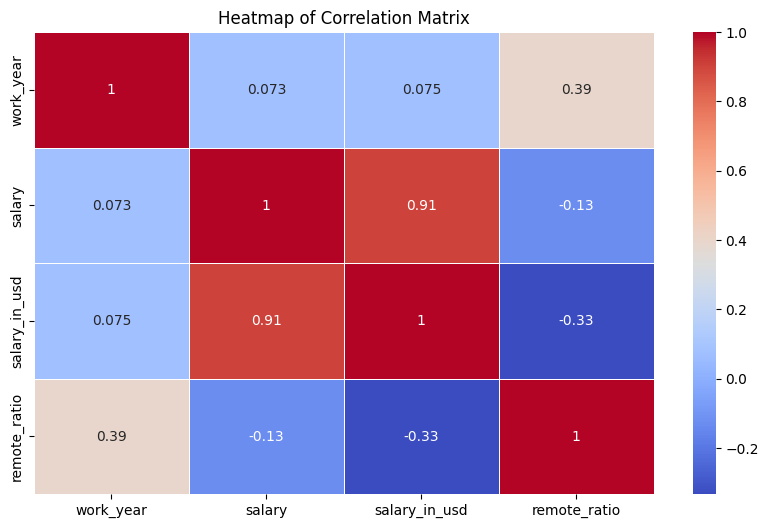

In [31]:
corr = dataScienceSalaries_pred.describe().corr()


# Calculate the correlation matrix

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

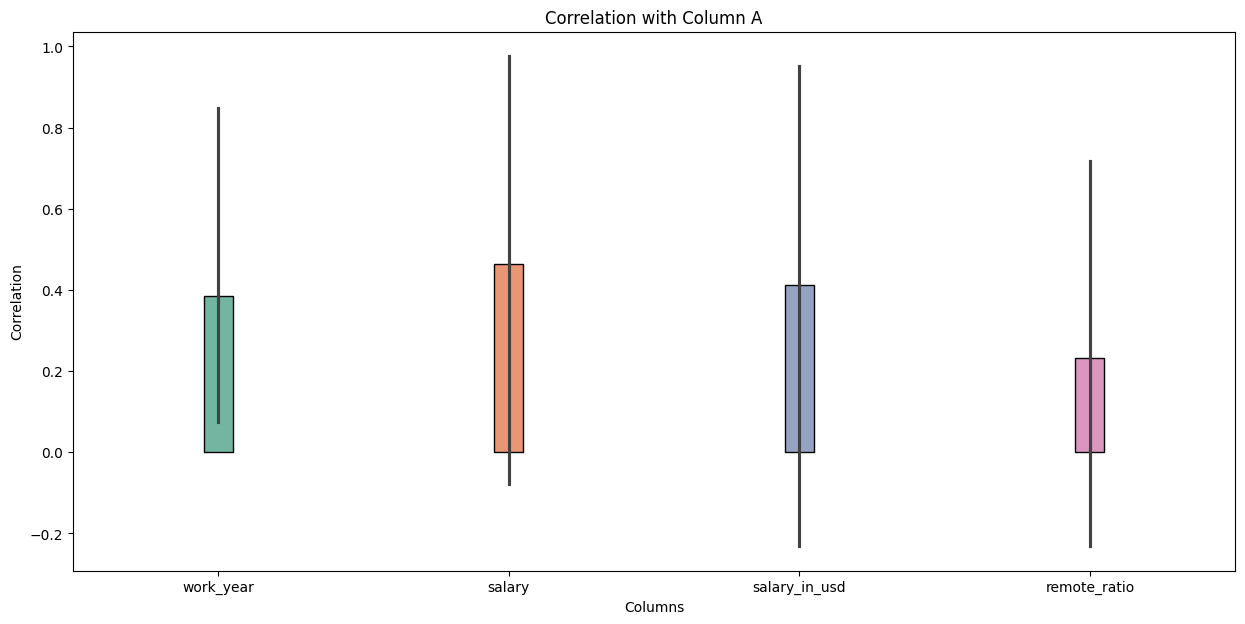

In [32]:
plt.figure(figsize=(15, 7))
# sns.barplot(x=corr.columns, y=corr.iloc[3], palette='viridis',linewidth = 1,weidth =0.3)
sns.barplot(corr,palette='Set2',edgecolor='black', linewidth=1,width=0.1,orient='v')
plt.title('Correlation with Column A')
plt.xlabel('Columns')
plt.ylabel('Correlation')    
plt.show()

In [33]:
dataScienceSalaries_pred.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [34]:
# Assuming you have features and target variables defined as X and y
x = dataScienceSalaries_pred.drop('salary', axis=1)  # Features (excluding the target column)
y =dataScienceSalaries_pred['salary']  # Target column (e.g., 'visitors')

In [35]:
x.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M


In [36]:
y.head()

0     80000
1     30000
2     25500
3    175000
4    120000
Name: salary, dtype: int64

In [37]:
x.shape

(2584, 10)

In [38]:
y.shape

(2584,)

In [39]:
# Separate numerical and categorical columns
numerical_features = x.select_dtypes(include=['int64']).columns
categorical_features = x.select_dtypes(include=['object']).columns


In [40]:
print(numerical_features)
print()
print(categorical_features)

Index(['work_year', 'salary_in_usd', 'remote_ratio'], dtype='object')

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')


In [57]:
# Preprocessing for numerical data (Standard scaling) and categorical data (One-Hot Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output = False,drop='first',handle_unknown='ignore'),categorical_features)
    ])

In [58]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['work_year', 'salary_in_usd', 'remote_ratio'], dtype='object')),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object'))])

In [59]:
# List of regression algorithms
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=6),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'SGD Regressor': SGDRegressor(),
    'Huber Regressor': HuberRegressor()
}

In [60]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [61]:
x_train.head(4)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
25,2023,SE,FT,Business Intelligence Engineer,USD,225000,US,0,US,M
2647,2022,MI,FT,Data Manager,USD,98000,US,0,US,M
2624,2022,SE,FT,Data Analyst,USD,139600,US,0,US,M
2565,2022,SE,FT,Data Analyst,USD,236600,US,100,US,M


In [62]:
x_test.head(3)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3181,2022,MI,FT,ETL Developer,EUR,52533,GR,0,GR,M
540,2023,MI,FT,Machine Learning Engineer,USD,90000,US,0,US,M
2640,2022,SE,FT,Data Architect,USD,225000,US,100,US,M


In [63]:
y.head()

0     80000
1     30000
2     25500
3    175000
4    120000
Name: salary, dtype: int64

In [64]:
y.head()

0     80000
1     30000
2     25500
3    175000
4    120000
Name: salary, dtype: int64

In [65]:
x_train.shape 

(2067, 10)

In [66]:
x_test.shape 

(517, 10)

In [67]:
y_train.shape

(2067,)

In [68]:
y_test.shape

(517,)

In [69]:

from sklearn.metrics import  mean_absolute_error, mean_squared_error,r2_score,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix  # For evaluation metrics

def evaluate_models(regressors, preprocessor, x_train, x_test, y_train, y_test):
    for name, model in regressors.items():
        # Create a pipeline with preprocessing and the regressor
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        
        # Train the model
        pipeline.fit(x_train, y_train)
        
        # Make predictions
        y_pred = pipeline.predict(x_test)
        
        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Print the results
        print(f'{name}:')
        print(f'  Mean Squared Error: {mse:.4f}')
        print(f'  R² Score: {r2:.4f}')
        print('-' * 40)
        
    
    
    # Evaluate all regression models
evaluate_models(regressors, preprocessor, x_train, x_test, y_train, y_test)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [2, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [2, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Linear Regression:
  Mean Squared Error: 11833311840246016829315730112512.0000
  R² Score: -37763824434711298048.0000
----------------------------------------
Ridge Regression:
  Mean Squared Error: 105866232287.4808
  R² Score: 0.6621
----------------------------------------


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.363e+13, tolerance: 1.524e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [2, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [2, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Lasso Regression:
  Mean Squared Error: 95406040071.9782
  R² Score: 0.6955
----------------------------------------
ElasticNet:
  Mean Squared Error: 229215227646.3703
  R² Score: 0.2685
----------------------------------------


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [2, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


SGD Regressor:
  Mean Squared Error: 96106732755.4742
  R² Score: 0.6933
----------------------------------------
Huber Regressor:
  Mean Squared Error: 276610921647.5021
  R² Score: 0.1172
----------------------------------------


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [2, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
